In [1]:
# Importing necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule, PyroSample
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

/opt/miniconda3/envs/NLP_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Reading the dataset
df = pd.read_csv('Thyroid_Diff.csv')
df.shape

(383, 17)

In [3]:
# Checking for any null values in the dataset
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [4]:
# Checking for any duplicated values in the dataset
df.duplicated().sum()

19

In [5]:
# Removing the duplicated values
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(364, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    object
 2   Smoking               364 non-null    object
 3   Hx Smoking            364 non-null    object
 4   Hx Radiothreapy       364 non-null    object
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    object
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


In [8]:
df.describe()

,Age
count,364.00000
mean,41.25000
std,15.31436
min,15.00000
25%,30.00000
50%,38.00000
75%,52.00000
max,82.00000


<h4> Checking categorical features and their value counts

In [9]:
categorical_features = [features for features in df.columns if df[features].dtypes == 'O']
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']

In [10]:
len(categorical_features)

16

In [11]:
df[categorical_features]

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [12]:
df['Gender'].value_counts()

Gender
F    293
M     71
Name: count, dtype: int64

In [13]:
df['Smoking'].value_counts()

Smoking
No     315
Yes     49
Name: count, dtype: int64

In [14]:
df['Hx Smoking'].value_counts()

Hx Smoking
No     336
Yes     28
Name: count, dtype: int64

In [15]:
df['Hx Radiothreapy'].value_counts()

Hx Radiothreapy
No     357
Yes      7
Name: count, dtype: int64

In [16]:
df['Thyroid Function'].value_counts()

Thyroid Function
Euthyroid                      313
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64

In [17]:
df['Physical Examination'].value_counts()

Physical Examination
Multinodular goiter            135
Single nodular goiter-right    127
Single nodular goiter-left      88
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64

In [18]:
df['Adenopathy'].value_counts()

Adenopathy
No           258
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: count, dtype: int64

In [19]:
df['Pathology'].value_counts()

Pathology
Papillary         271
Micropapillary     45
Follicular         28
Hurthel cell       20
Name: count, dtype: int64

In [20]:
df['Focality'].value_counts()

Focality
Uni-Focal      228
Multi-Focal    136
Name: count, dtype: int64

In [21]:
df['Risk'].value_counts()

Risk
Low             230
Intermediate    102
High             32
Name: count, dtype: int64

In [22]:
df['T'].value_counts()

T
T2     138
T3a     96
T1a     46
T1b     40
T4a     20
T3b     16
T4b      8
Name: count, dtype: int64

In [23]:
df['N'].value_counts()

N
N0     249
N1b     93
N1a     22
Name: count, dtype: int64

In [24]:
df['M'].value_counts()

M
M0    346
M1     18
Name: count, dtype: int64

In [25]:
df['Stage'].value_counts()

Stage
I      314
II      32
IVB     11
III      4
IVA      3
Name: count, dtype: int64

In [26]:
df['Response'].value_counts()

Response
Excellent                 189
Structural Incomplete      91
Indeterminate              61
Biochemical Incomplete     23
Name: count, dtype: int64

In [27]:
df['Recurred'].value_counts()

Recurred
No     256
Yes    108
Name: count, dtype: int64

In [28]:
features_to_binary_encode = ['Recurred', 'M', 'Hx Radiothreapy', 'Hx Smoking', 'Smoking', 'Gender', 'Focality']
# Fill NaN values before encoding
for col in features_to_binary_encode:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Apply get_dummies with correct syntax
df = pd.get_dummies(df, 
                    columns=features_to_binary_encode,
                    drop_first=True,
                    prefix=features_to_binary_encode)

In [29]:
len(features_to_binary_encode)

7

In [30]:
df.shape

(364, 17)

In [31]:
df.head()

,Age,Thyroid Function,Physical Examination,Adenopathy,Pathology,Risk,T,N,Stage,Response,Recurred_Yes,M_M1,Hx Radiothreapy_Yes,Hx Smoking_Yes,Smoking_Yes,Gender_M,Focality_Uni-Focal
0,27,Euthyroid,Single nodular goiter-left,No,Micropapillary,Low,T1a,N0,I,Indeterminate,False,False,False,False,False,False,True
1,34,Euthyroid,Multinodular goiter,No,Micropapillary,Low,T1a,N0,I,Excellent,False,False,False,True,False,False,True
2,30,Euthyroid,Single nodular goiter-right,No,Micropapillary,Low,T1a,N0,I,Excellent,False,False,False,False,False,False,True
3,62,Euthyroid,Single nodular goiter-right,No,Micropapillary,Low,T1a,N0,I,Excellent,False,False,False,False,False,False,True
4,62,Euthyroid,Multinodular goiter,No,Micropapillary,Low,T1a,N0,I,Excellent,False,False,False,False,False,False,False


In [32]:
# Label encoding the non-binary categorical features
features_to_label_encode = ['Thyroid Function', 'Physical Examination', 
                           'Adenopathy', 'Pathology', 'Risk', 'T', 'N', 
                           'Stage', 'Response']

# Initialize LabelEncoder
le = LabelEncoder()

# Encode each feature
for feature in features_to_label_encode:
    if feature in df.columns:
        # Handle missing values
        df[feature] = df[feature].fillna(df[feature].mode()[0])
        
        # Apply label encoding
        df[feature] = le.fit_transform(df[feature])

# Verify encoding
print("Encoded features unique values:")
for feature in features_to_label_encode:
    if feature in df.columns:
        print(f"{feature}: {df[feature].unique()}")

Encoded features unique values:
Thyroid Function: [2 0 1 3 4]
Physical Examination: [3 1 4 2 0]
Adenopathy: [3 5 1 2 0 4]
Pathology: [2 3 0 1]
Risk: [2 1 0]
T: [0 1 2 3 4 5 6]
N: [0 2 1]
Stage: [0 1 4 2 3]
Response: [2 1 3 0]


In [33]:
df.head()

,Age,Thyroid Function,Physical Examination,Adenopathy,Pathology,Risk,T,N,Stage,Response,Recurred_Yes,M_M1,Hx Radiothreapy_Yes,Hx Smoking_Yes,Smoking_Yes,Gender_M,Focality_Uni-Focal
0,27,2,3,3,2,2,0,0,0,2,False,False,False,False,False,False,True
1,34,2,1,3,2,2,0,0,0,1,False,False,False,True,False,False,True
2,30,2,4,3,2,2,0,0,0,1,False,False,False,False,False,False,True
3,62,2,4,3,2,2,0,0,0,1,False,False,False,False,False,False,True
4,62,2,1,3,2,2,0,0,0,1,False,False,False,False,False,False,False


In [34]:
df.shape

(364, 17)

In [35]:
df.head()

,Age,Thyroid Function,Physical Examination,Adenopathy,Pathology,Risk,T,N,Stage,Response,Recurred_Yes,M_M1,Hx Radiothreapy_Yes,Hx Smoking_Yes,Smoking_Yes,Gender_M,Focality_Uni-Focal
0,27,2,3,3,2,2,0,0,0,2,False,False,False,False,False,False,True
1,34,2,1,3,2,2,0,0,0,1,False,False,False,True,False,False,True
2,30,2,4,3,2,2,0,0,0,1,False,False,False,False,False,False,True
3,62,2,4,3,2,2,0,0,0,1,False,False,False,False,False,False,True
4,62,2,1,3,2,2,0,0,0,1,False,False,False,False,False,False,False


In [36]:
df.to_csv('data_case_1')

In [37]:
X = df.drop('Focality_Uni-Focal', axis=1)
y = df['Focality_Uni-Focal']

In [38]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (364, 16)
Target shape: (364,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Example: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Returns a NumPy array
X_test = scaler.transform(X_test)       # Returns a NumPy array

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

# Check the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([291, 16]) torch.Size([73, 16]) torch.Size([291]) torch.Size([73])


In [41]:
# Ensure shape consistency
assert X_train.size(0) == y_train.size(0), "X_train and y_train size mismatch"
assert X_test.size(0) == y_test.size(0), "X_test and y_test size mismatch"

# Implementing Bayesian Neural Network

/opt/miniconda3/envs/NLP_env/lib/python3.12/site-packages/pyro/util.py:303: UserWarning: Found vars in model but not guide: {'fc3.weight', 'fc3.bias', 'out.weight', 'fc1.bias', 'fc2.bias', 'fc2.weight', 'out.bias', 'fc1.weight'}
  warnings.warn(f"Found vars in model but not guide: {bad_sites}")


Epoch 20/400 - Loss: 212041.5846
Epoch 40/400 - Loss: 194695.1086
Epoch 60/400 - Loss: 232641.3824
Epoch 80/400 - Loss: 188607.7127
Epoch 100/400 - Loss: 212455.5306
Epoch 120/400 - Loss: 204034.1120
Epoch 140/400 - Loss: 219525.6013
Epoch 160/400 - Loss: 200014.6568
Epoch 180/400 - Loss: 200895.5221
Epoch 200/400 - Loss: 201696.7226
Epoch 220/400 - Loss: 186578.1994
Epoch 240/400 - Loss: 261069.0577
Epoch 260/400 - Loss: 199155.2669
Epoch 280/400 - Loss: 200576.0407
Epoch 300/400 - Loss: 194776.5120
Epoch 320/400 - Loss: 220638.4885
Epoch 340/400 - Loss: 194658.2730
Epoch 360/400 - Loss: 208244.6102
Epoch 380/400 - Loss: 213446.6748
Epoch 400/400 - Loss: 241068.9513

Classification Report:
              precision    recall  f1-score   support

         0.0       0.33      0.69      0.45        26
         1.0       0.58      0.23      0.33        47

    accuracy                           0.40        73
   macro avg       0.46      0.46      0.39        73
weighted avg       0.49     

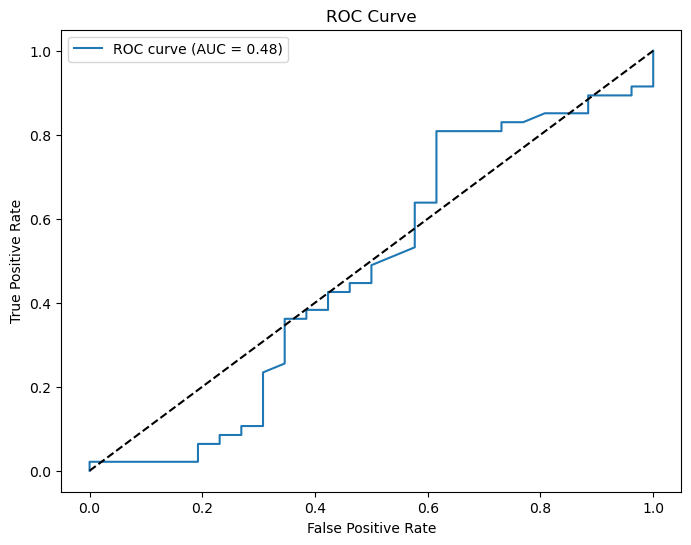

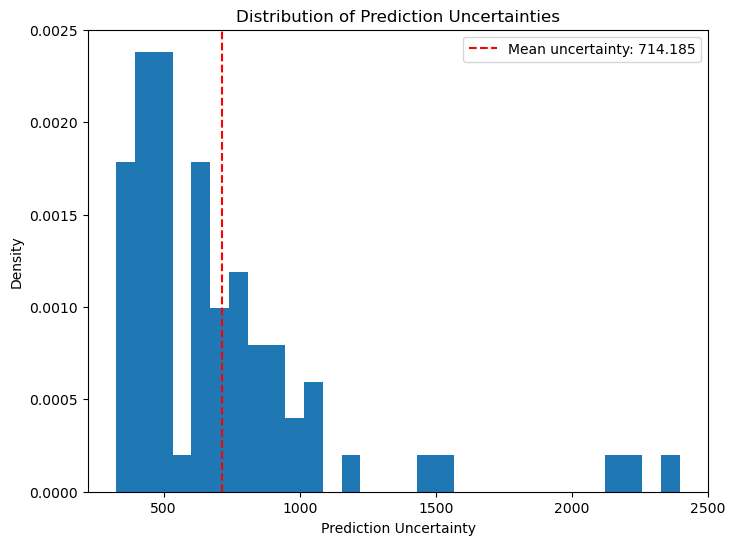

In [42]:
class BayesianNN(PyroModule):
    def __init__(self, input_dim, hidden_dim=64):
        super().__init__()
        self.fc1 = PyroModule[torch.nn.Linear](input_dim, hidden_dim)
        self.fc2 = PyroModule[torch.nn.Linear](hidden_dim, hidden_dim)
        self.fc3 = PyroModule[torch.nn.Linear](hidden_dim, hidden_dim)
        self.out = PyroModule[torch.nn.Linear](hidden_dim, 1)
        
        # Initialize priors
        for layer in [self.fc1, self.fc2, self.fc3, self.out]:
            layer.weight = PyroSample(dist.Normal(0., 1.).expand(layer.weight.shape).to_event(2))
            layer.bias = PyroSample(dist.Normal(0., 1.).expand(layer.bias.shape).to_event(1))

    def forward(self, x, y=None):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        logits = self.out(x).squeeze(-1)  # Logits before sigmoid
        
        with pyro.plate("data", x.shape[0]):
            if y is not None:
                pyro.sample("obs", dist.Bernoulli(logits=logits), obs=y)
        return logits  # Return logits (not probabilities)


def model(bnn, x_data, y_data=None):
    """Wrap the BayesianNN forward pass."""
    return bnn(x_data, y_data)


def guide(bnn, x_data, y_data=None):
    """Define the variational distribution."""
    for name, param in bnn.named_parameters():
        mean = pyro.param(f"{name}_mean", torch.zeros_like(param))
        scale = pyro.param(f"{name}_scale", torch.ones_like(param),
                           constraint=dist.constraints.positive)
        prior = dist.Normal(mean, scale)
        pyro.sample(name, prior)


def train_bnn(bnn, train_loader, num_epochs=200, lr=0.01):
    """Train the Bayesian Neural Network."""
    pyro.clear_param_store()
    adam = pyro.optim.Adam({"lr": lr})
    elbo = pyro.infer.Trace_ELBO()
    svi = pyro.infer.SVI(lambda x, y: model(bnn, x, y),
                         lambda x, y: guide(bnn, x, y), 
                         adam, elbo)
    
    losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for batch_x, batch_y in train_loader:
            loss = svi.step(batch_x, batch_y)
            epoch_loss += loss
        
        losses.append(epoch_loss)
        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}")
    return losses


def predict_bnn(bnn, x_data, num_samples=100):
    """Make predictions using the Bayesian Neural Network."""
    predictive = pyro.infer.Predictive(lambda x, y=None: model(bnn, x, y),
                                       guide=bnn,
                                       num_samples=num_samples,
                                       return_sites=["obs", "_RETURN"])
    samples = predictive(x_data)
    
    # Extract logits and calculate probabilities
    logits = samples["_RETURN"]
    probs = torch.sigmoid(logits).mean(0).detach().numpy()
    uncertainties = logits.std(0).detach().numpy()
    predictions = (probs > 0.5).astype(int)
    return predictions, probs, uncertainties

# Instantiate BayesianNN
input_dim = X_train.shape[1]
bnn = BayesianNN(input_dim=input_dim)

# Train the model
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
losses = train_bnn(bnn, train_loader, num_epochs=400)

# Make predictions
predictions_bnn, probabilities_bnn, uncertainties_bnn = predict_bnn(bnn, X_test)

# Evaluate and visualize results
from sklearn.metrics import classification_report, roc_curve, auc
print("\nClassification Report:")
print(classification_report(y_test, predictions_bnn))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, probabilities_bnn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot uncertainty distribution
plt.figure(figsize=(8, 6))
plt.hist(uncertainties_bnn, bins=30, density=True)
plt.axvline(uncertainties_bnn.mean(), color='r', linestyle='--', 
            label=f'Mean uncertainty: {uncertainties_bnn.mean():.3f}')
plt.xlabel('Prediction Uncertainty')
plt.ylabel('Density')
plt.title('Distribution of Prediction Uncertainties')
plt.legend()
plt.show()

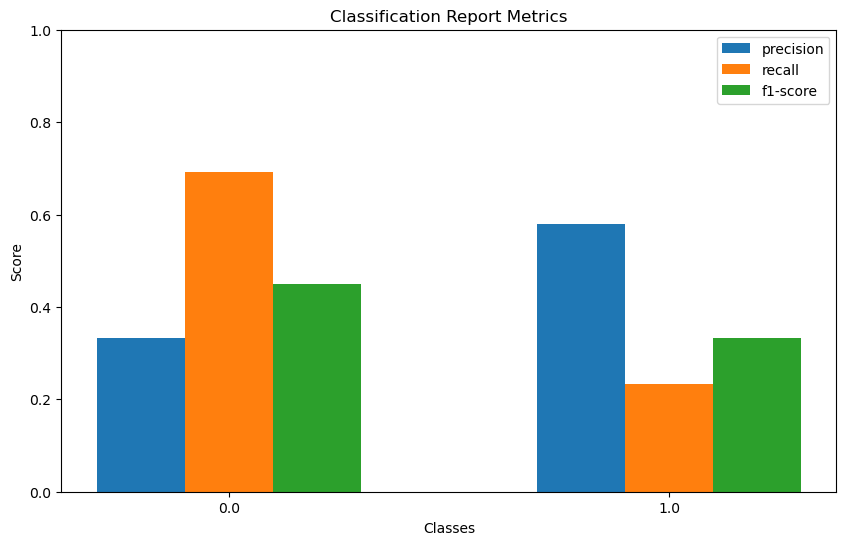

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

def plot_classification_report(y_true, y_pred):
    # Generate the classification report as a dictionary
    report = classification_report(y_true, y_pred, output_dict=True)

    # Extract metrics
    metrics = ["precision", "recall", "f1-score"]
    classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
    values = [[report[cls][metric] for cls in classes] for metric in metrics]

    # Plot
    x = np.arange(len(classes))
    width = 0.2  # Width of bars

    plt.figure(figsize=(10, 6))
    for i, metric in enumerate(metrics):
        plt.bar(x + i * width, values[i], width, label=metric)

    # Add details to the plot
    plt.xticks(x + width, classes)
    plt.xlabel("Classes")
    plt.ylabel("Score")
    plt.title("Classification Report Metrics")
    plt.legend()
    plt.ylim(0, 1)  # Metrics range from 0 to 1
    plt.show()

# Call this function with y_test and predictions
plot_classification_report(y_test, predictions_bnn)

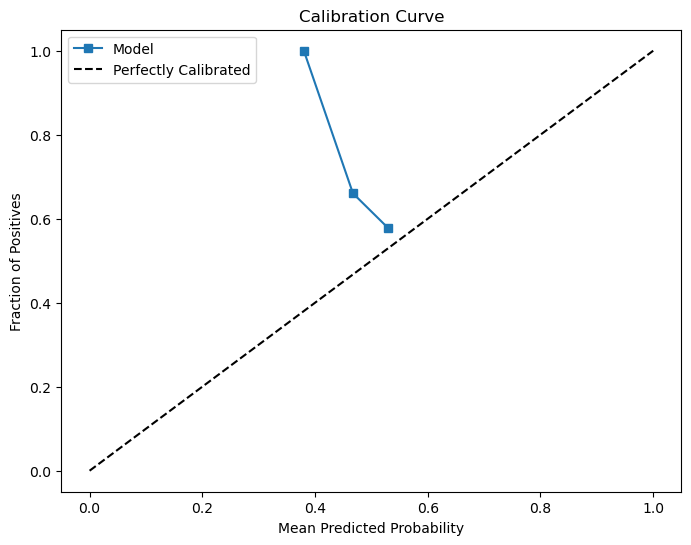

In [44]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

def plot_calibration_curve(y_true, y_probs):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_probs, n_bins=10)
    plt.figure(figsize=(8, 6))
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Model")
    plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("Fraction of Positives")
    plt.title("Calibration Curve")
    plt.legend()
    plt.show()

# Call this function with y_test and probabilities
plot_calibration_curve(y_test, probabilities_bnn)

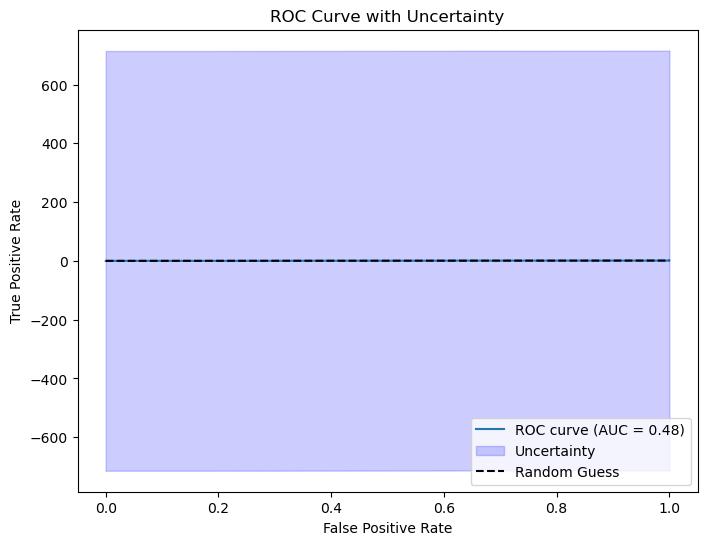

In [45]:
from sklearn.metrics import roc_curve, auc

def plot_roc_with_uncertainty(y_true, y_probs, uncertainties):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.fill_between(fpr, tpr - uncertainties.mean(), tpr + uncertainties.mean(),
                     color="blue", alpha=0.2, label="Uncertainty")
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve with Uncertainty")
    plt.legend()
    plt.show()

# Call this function with y_test, probabilities, and uncertainties
plot_roc_with_uncertainty(y_test, probabilities_bnn, uncertainties_bnn)

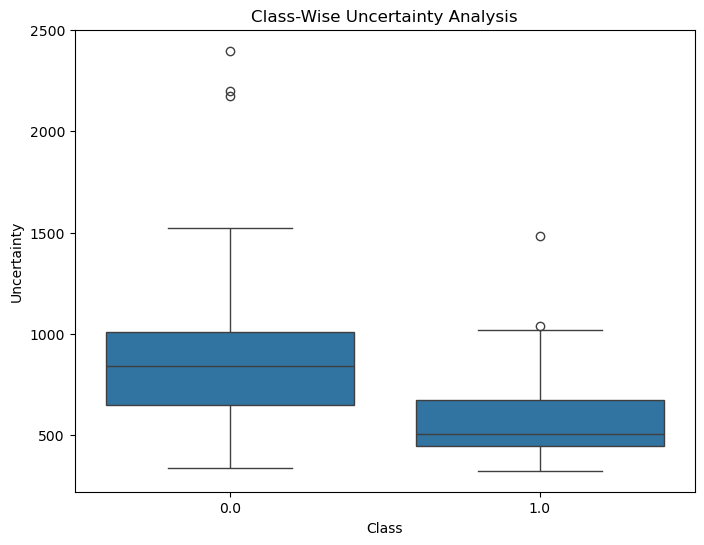

In [46]:
import pandas as pd
import seaborn as sns

def plot_classwise_uncertainty(y_true, uncertainties):
    data = pd.DataFrame({"True Class": y_true, "Uncertainty": uncertainties})
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="True Class", y="Uncertainty", data=data)
    plt.xlabel("Class")
    plt.ylabel("Uncertainty")
    plt.title("Class-Wise Uncertainty Analysis")
    plt.show()

# Call this function with y_test and uncertainties
plot_classwise_uncertainty(y_test, uncertainties_bnn)

# Implementing Monte-Carlo Dropout

Epoch 10, Loss: 1.6718
Epoch 20, Loss: 1.5687
Epoch 30, Loss: 0.6914
Epoch 40, Loss: 0.8099
Epoch 50, Loss: 0.4124
Epoch 60, Loss: 0.4002
Epoch 70, Loss: 0.2079
Epoch 80, Loss: 0.9639
Epoch 90, Loss: 0.6963
Epoch 100, Loss: 0.7134

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       107
         1.0       0.90      0.96      0.93        93

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



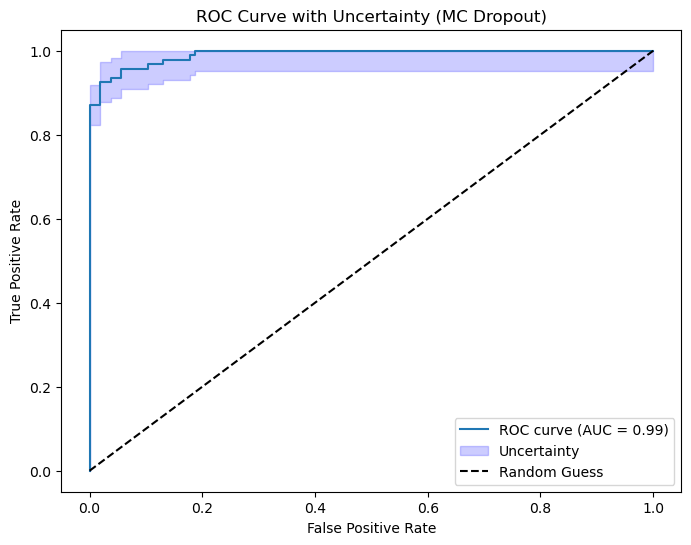

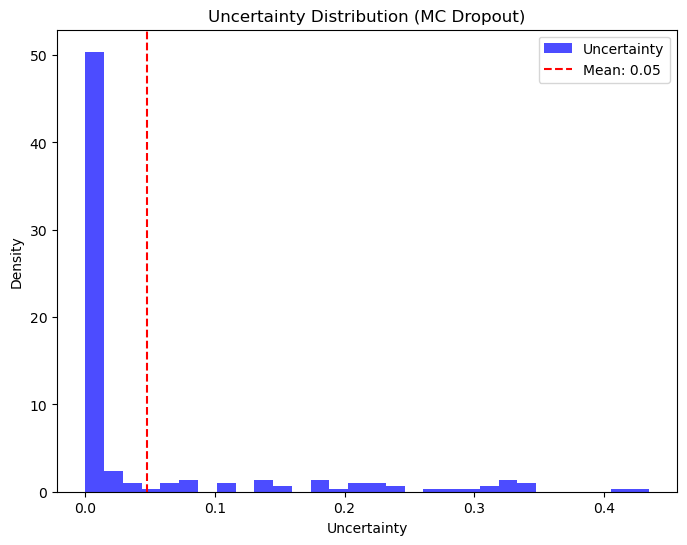

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Define a Neural Network with Dropout for Classification
class MCDropoutNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_classes=1):
        super(MCDropoutNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.out = nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(p=0.2)  # Dropout probability

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Dropout active during training
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        if self.out.out_features == 1:  # Binary classification
            x = torch.sigmoid(self.out(x))
        else:  # Multi-class classification
            x = torch.softmax(self.out(x), dim=-1)
        return x

# Function to train the MC Dropout model
def train_mc_dropout(model, train_loader, num_epochs=400, lr=0.01):
    criterion = nn.BCELoss() if model.out.out_features == 1 else nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    model.train()  # Set the model to training mode
    for epoch in range(num_epochs):
        epoch_loss = 0
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(x_batch).squeeze(-1)
            loss = criterion(outputs, y_batch.float() if model.out.out_features == 1 else y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}")

# Function to predict using MC Dropout
def predict_mc_dropout(model, x_data, num_samples=100):
    model.train()  # Enable Dropout during inference
    predictions = torch.stack([model(x_data) for _ in range(num_samples)])
    mean_prediction = predictions.mean(0).detach().numpy()
    uncertainty = predictions.std(0).detach().numpy()
    return mean_prediction, uncertainty

# Plot ROC Curve with Uncertainty
def plot_roc_with_uncertainty(y_true, y_probs, uncertainties):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.fill_between(
        fpr, 
        np.clip(tpr - uncertainties.mean(), 0, 1), 
        np.clip(tpr + uncertainties.mean(), 0, 1),
        color="blue", alpha=0.2, label="Uncertainty"
    )
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve with Uncertainty (MC Dropout)")
    plt.legend()
    plt.show()

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split dataset into training and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create DataLoader for training
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize the MC Dropout model
input_dim = X.shape[1]
model = MCDropoutNN(input_dim)

# Train the model
train_mc_dropout(model, train_loader, num_epochs=100, lr=0.01)

# Predict with MC Dropout
mean_prediction_mc, uncertainty_mc = predict_mc_dropout(model, X_test, num_samples=100)

# For binary classification, threshold predictions at 0.5
predicted_classes = (mean_prediction_mc > 0.5).astype(int)

# Evaluate results
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))

# Plot ROC Curve with Uncertainty
plot_roc_with_uncertainty(y_test, mean_prediction_mc, uncertainty_mc)

# Visualize uncertainty
plt.figure(figsize=(8, 6))
plt.hist(uncertainty_mc, bins=30, density=True, alpha=0.7, color="blue", label="Uncertainty")
plt.axvline(uncertainty_mc.mean(), color="red", linestyle="--", label=f"Mean: {uncertainty_mc.mean():.2f}")
plt.xlabel("Uncertainty")
plt.ylabel("Density")
plt.title("Uncertainty Distribution (MC Dropout)")
plt.legend()
plt.show()

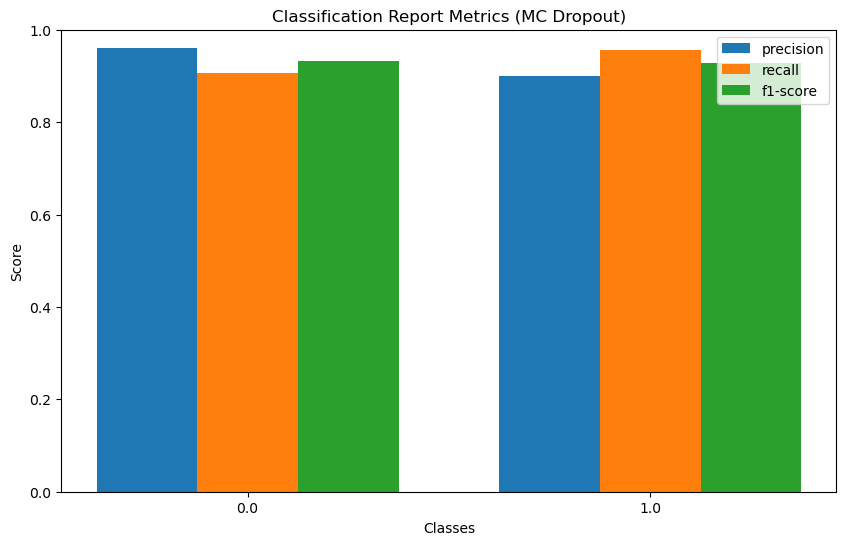

In [48]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

def plot_classification_report_metrics(y_true, y_pred):
    """
    Plot precision, recall, and F1-score from a classification report.
    
    Args:
        y_true: Ground truth labels
        y_pred: Predicted labels
    """
    # Generate the classification report as a dictionary
    report = classification_report(y_true, y_pred, output_dict=True)

    # Extract metrics
    metrics = ["precision", "recall", "f1-score"]
    classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
    values = [[report[cls][metric] for cls in classes] for metric in metrics]

    # Convert metrics to NumPy array for easy indexing
    values = np.array(values)

    # Plotting
    x = np.arange(len(classes))
    width = 0.25  # Width of the bars

    plt.figure(figsize=(10, 6))
    for i, metric in enumerate(metrics):
        plt.bar(x + i * width, values[i], width, label=metric)

    # Add labels, title, and legend
    plt.xticks(x + width, classes)
    plt.xlabel("Classes")
    plt.ylabel("Score")
    plt.ylim(0, 1)  # Metrics range from 0 to 1
    plt.title("Classification Report Metrics (MC Dropout)")
    plt.legend()
    plt.show()

# Call this function after generating predictions
plot_classification_report_metrics(y_test, predicted_classes)

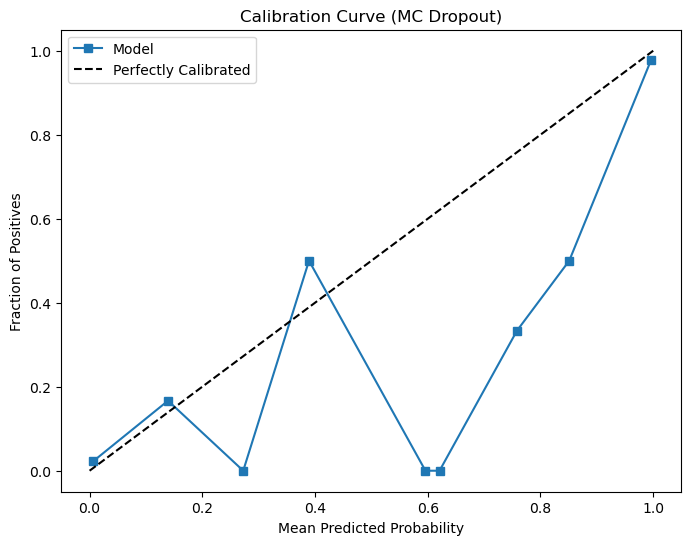

In [49]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

def plot_calibration_curve(y_true, y_probs, n_bins=10):
    """
    Plot the calibration curve to evaluate model probability calibration.
    
    Args:
        y_true: Ground truth binary labels.
        y_probs: Predicted probabilities for the positive class.
        n_bins: Number of bins to group predictions.
    """
    # Compute the calibration curve
    fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_probs, n_bins=n_bins)

    # Plot the calibration curve
    plt.figure(figsize=(8, 6))
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Model")
    plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("Fraction of Positives")
    plt.title("Calibration Curve (MC Dropout)")
    plt.legend()
    plt.show()

# Call this function with true labels and predicted probabilities
plot_calibration_curve(y_test, mean_prediction_mc)

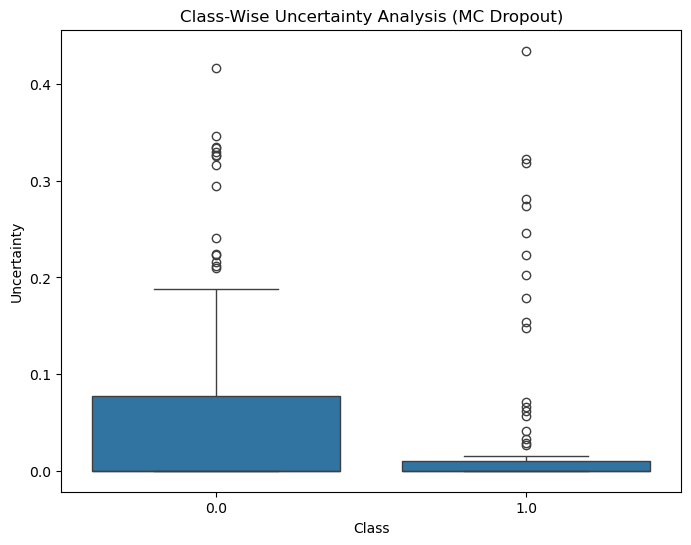

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_classwise_uncertainty(y_true, uncertainties):
    """
    Plot a boxplot of uncertainty values grouped by true class labels.

    Args:
        y_true: Ground truth binary class labels (0 or 1).
        uncertainties: Array of uncertainty values corresponding to predictions.
    """
    # Ensure inputs are 1D
    y_true = np.array(y_true).ravel()  # Flatten y_true to 1D
    uncertainties = np.array(uncertainties).ravel()  # Flatten uncertainties to 1D

    # Prepare data for plotting
    if len(y_true) != len(uncertainties):
        raise ValueError("y_true and uncertainties must have the same length.")
    
    data = pd.DataFrame({"True Class": y_true, "Uncertainty": uncertainties})
    
    # Plot the boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="True Class", y="Uncertainty", data=data)
    plt.xlabel("Class")
    plt.ylabel("Uncertainty")
    plt.title("Class-Wise Uncertainty Analysis (MC Dropout)")
    plt.show()

# Example Usage:
# Assuming y_test (true labels) and uncertainty_mc (uncertainty values) are available

# Call the function with ground truth and uncertainties
plot_classwise_uncertainty(y_test, uncertainty_mc)

In [51]:
print(f"y_test shape: {np.array(y_test).shape}")
print(f"uncertainty_mc shape: {np.array(uncertainty_mc).shape}")

y_test shape: (200,)
uncertainty_mc shape: (200, 1)


# Implementing Deep Ensemble

Training model 1/5
Epoch 10, Loss: 0.4375
Epoch 20, Loss: 0.0365
Epoch 30, Loss: 0.0046
Epoch 40, Loss: 0.0021
Epoch 50, Loss: 0.0013
Epoch 60, Loss: 0.0008
Epoch 70, Loss: 0.0006
Epoch 80, Loss: 0.0004
Epoch 90, Loss: 0.0003
Epoch 100, Loss: 0.0003
Epoch 110, Loss: 0.0002
Epoch 120, Loss: 0.0002
Epoch 130, Loss: 0.0001
Epoch 140, Loss: 0.0001
Epoch 150, Loss: 0.0001
Epoch 160, Loss: 0.0001
Epoch 170, Loss: 0.0001
Epoch 180, Loss: 0.0001
Epoch 190, Loss: 0.0000
Epoch 200, Loss: 0.0000
Epoch 210, Loss: 0.0000
Epoch 220, Loss: 0.0000
Epoch 230, Loss: 0.0000
Epoch 240, Loss: 0.0000
Epoch 250, Loss: 0.0000
Epoch 260, Loss: 0.0000
Epoch 270, Loss: 0.0000
Epoch 280, Loss: 0.0000
Epoch 290, Loss: 0.0000
Epoch 300, Loss: 0.0000
Epoch 310, Loss: 0.0000
Epoch 320, Loss: 0.0000
Epoch 330, Loss: 0.0000
Epoch 340, Loss: 0.0000
Epoch 350, Loss: 0.0000
Epoch 360, Loss: 0.0000
Epoch 370, Loss: 0.0000
Epoch 380, Loss: 0.0000
Epoch 390, Loss: 0.0000
Epoch 400, Loss: 0.0000
Training model 2/5
Epoch 10, L

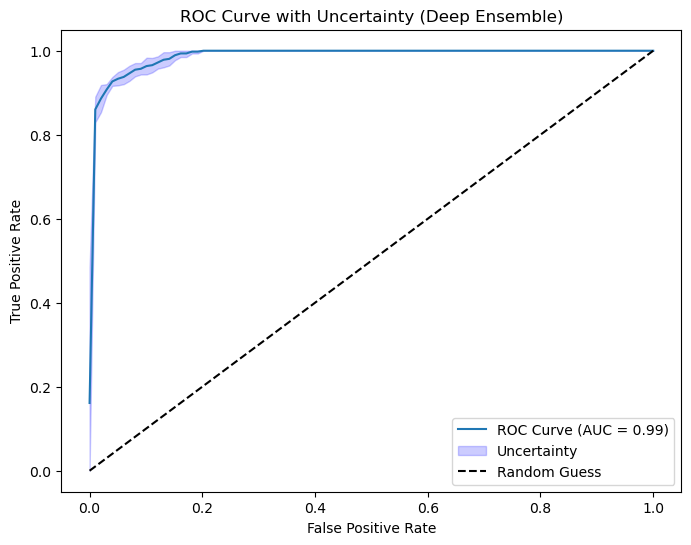

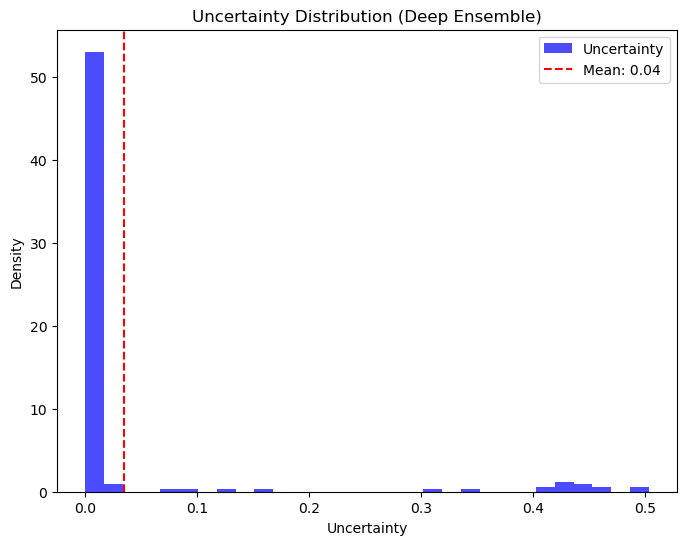

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Define a simple feedforward neural network
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.out = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.out(x))  # Sigmoid for binary classification
        return x

# Function to train a single model
def train_model(model, train_loader, num_epochs=100, lr=0.01):
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=lr)

    model.train()  # Set the model to training mode
    for epoch in range(num_epochs):
        epoch_loss = 0
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(x_batch).squeeze(-1)  # Shape [batch_size]
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}")

# Function to predict using an ensemble of models
def predict_ensemble(models, x_data):
    predictions = torch.stack([model(x_data).squeeze(-1) for model in models])  # Shape [ensemble_size, data_size]
    mean_prediction = predictions.mean(0).detach().numpy()  # Mean probability
    uncertainty = predictions.std(0).detach().numpy()  # Standard deviation as uncertainty
    return mean_prediction, uncertainty

# Create DataLoader for training
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize an ensemble of models
input_dim = X_train.shape[1]
ensemble_size = 5  # Number of models in the ensemble
models = [SimpleNN(input_dim) for _ in range(ensemble_size)]

# Train each model independently
for i, model in enumerate(models):
    print(f"Training model {i + 1}/{ensemble_size}")
    train_model(model, train_loader, num_epochs=400, lr=0.01)

# Predict with the ensemble
mean_prediction_ensemble, uncertainty_ensemble = predict_ensemble(models, X_test)

# Evaluate results
y_pred_classes = (mean_prediction_ensemble > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test.numpy(), y_pred_classes))

# ROC Curve and AUC with Uncertainty
fpr_list, tpr_list = [], []

# Generate FPR and TPR for each model in the ensemble
for model in models:
    predictions = model(X_test).squeeze(-1).detach().numpy()
    fpr, tpr, _ = roc_curve(y_test.numpy(), predictions)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

# Align FPR and calculate mean and std of TPRs
fpr_aligned = np.linspace(0, 1, 100)  # Fixed FPR range
tpr_aligned = np.array([np.interp(fpr_aligned, fpr_list[i], tpr_list[i]) for i in range(len(models))])
tpr_mean = tpr_aligned.mean(axis=0)
tpr_std = tpr_aligned.std(axis=0)

# Calculate mean AUC
roc_auc = auc(fpr_aligned, tpr_mean)

# Plot ROC Curve with Uncertainty
plt.figure(figsize=(8, 6))
plt.plot(fpr_aligned, tpr_mean, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.fill_between(
    fpr_aligned,
    np.clip(tpr_mean - tpr_std, 0, 1),
    np.clip(tpr_mean + tpr_std, 0, 1),
    color="blue",
    alpha=0.2,
    label="Uncertainty"
)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Uncertainty (Deep Ensemble)")
plt.legend()
plt.show()

# Plot Uncertainty Distribution
plt.figure(figsize=(8, 6))
plt.hist(uncertainty_ensemble, bins=30, alpha=0.7, color="blue", density=True, label="Uncertainty")
plt.axvline(uncertainty_ensemble.mean(), color="red", linestyle="--", label=f"Mean: {uncertainty_ensemble.mean():.2f}")
plt.xlabel("Uncertainty")
plt.ylabel("Density")
plt.title("Uncertainty Distribution (Deep Ensemble)")
plt.legend()
plt.show()

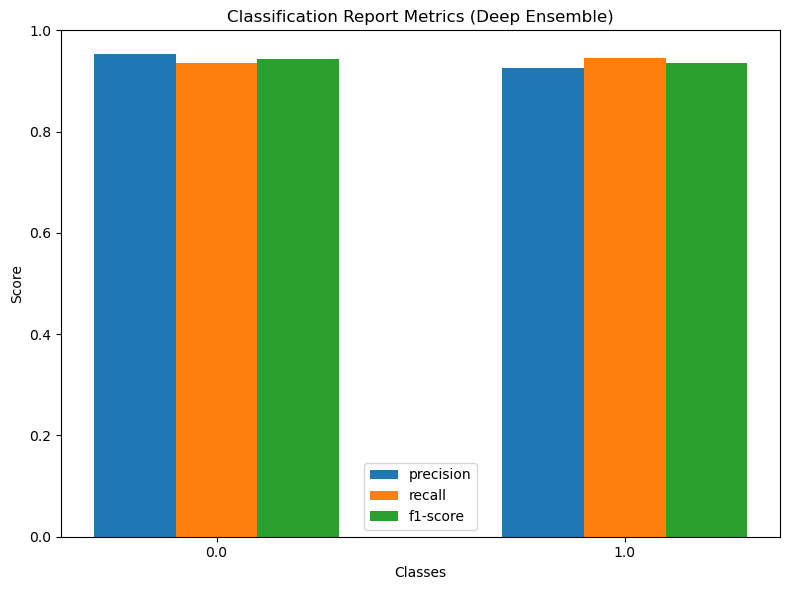

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have already calculated the classification report
# Replace with your deep ensemble's predictions and true labels
report = classification_report(y_test.numpy(), y_pred_classes, output_dict=True)

# Extract precision, recall, and f1-score for each class
classes = [str(cls) for cls in report.keys() if cls not in ["accuracy", "macro avg", "weighted avg"]]
precision = [report[cls]["precision"] for cls in classes]
recall = [report[cls]["recall"] for cls in classes]
f1_score = [report[cls]["f1-score"] for cls in classes]

# Set up bar plot positions and width
x = np.arange(len(classes))  # Class labels
width = 0.2  # Width of each bar

# Plot each metric as a grouped bar chart
plt.figure(figsize=(8, 6))
plt.bar(x - width, precision, width, label="precision")
plt.bar(x, recall, width, label="recall")
plt.bar(x + width, f1_score, width, label="f1-score")

# Add labels, title, and legend
plt.xlabel("Classes")
plt.ylabel("Score")
plt.title("Classification Report Metrics (Deep Ensemble)")
plt.xticks(x, classes)  # Set class labels on x-axis
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


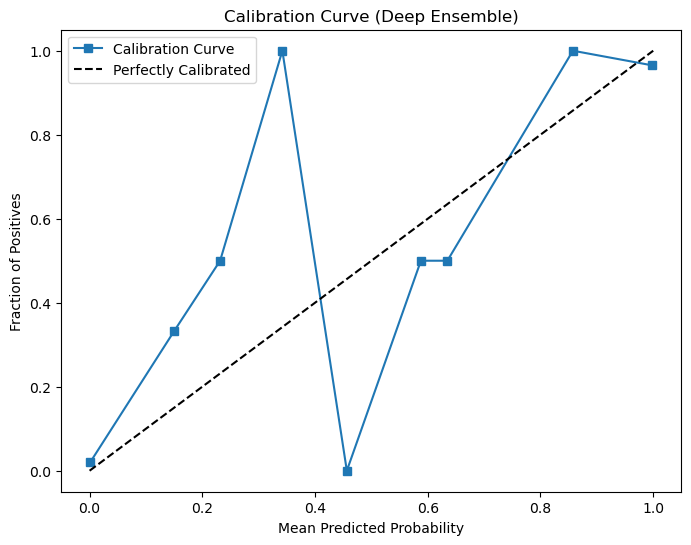

In [54]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

def plot_calibration_curve(y_true, y_prob, n_bins=10):
    """
    Plot a calibration curve to visualize how well predicted probabilities are calibrated.
    
    Args:
        y_true: Ground truth binary labels (0 or 1).
        y_prob: Predicted probabilities (mean predictions from the ensemble).
        n_bins: Number of bins to group predictions.
    """
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=n_bins, strategy='uniform')
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, "s-", label="Calibration Curve")
    plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("Fraction of Positives")
    plt.title("Calibration Curve (Deep Ensemble)")
    plt.legend()
    plt.show()

# Example usage
plot_calibration_curve(y_test.numpy(), mean_prediction_ensemble)

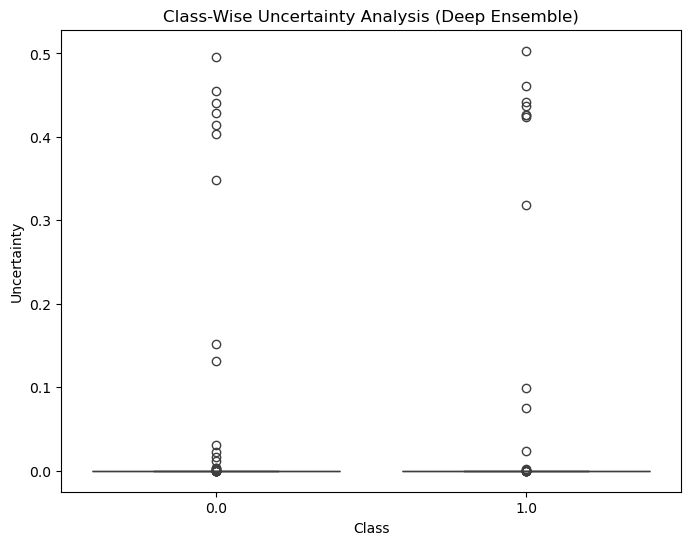

In [55]:
import pandas as pd
import seaborn as sns

def plot_classwise_uncertainty(y_true, uncertainties):
    """
    Plot a boxplot of uncertainty values grouped by true class labels.
    
    Args:
        y_true: Ground truth binary class labels (0 or 1).
        uncertainties: Array of uncertainty values corresponding to predictions.
    """
    # Prepare data for plotting
    data = pd.DataFrame({"True Class": y_true, "Uncertainty": uncertainties})
    
    # Plot the boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="True Class", y="Uncertainty", data=data)
    plt.xlabel("Class")
    plt.ylabel("Uncertainty")
    plt.title("Class-Wise Uncertainty Analysis (Deep Ensemble)")
    plt.show()

# Example usage
plot_classwise_uncertainty(y_test.numpy(), uncertainty_ensemble)

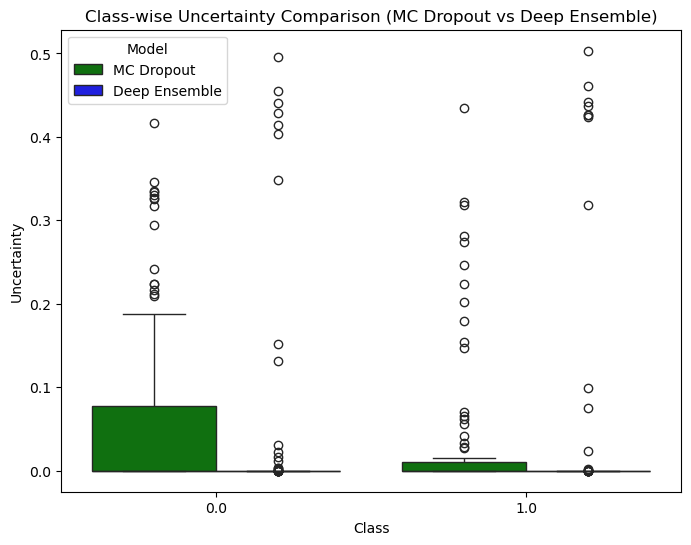

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_classwise_uncertainty_mc_vs_ensemble(y_true_mc, uncertainty_mc, y_true_ensemble, uncertainty_ensemble):
    # Ensure that all uncertainty arrays are 1D and of the same length as y_true
    if uncertainty_mc.ndim > 1:
        uncertainty_mc = uncertainty_mc.flatten()
    if uncertainty_ensemble.ndim > 1:
        uncertainty_ensemble = uncertainty_ensemble.flatten()

    # Make sure lengths match with y_true
    assert len(uncertainty_mc) == len(y_true_mc), f"Length mismatch: {len(uncertainty_mc)} vs {len(y_true_mc)}"
    assert len(uncertainty_ensemble) == len(y_true_ensemble), f"Length mismatch: {len(uncertainty_ensemble)} vs {len(y_true_ensemble)}"
    
    # Create DataFrames for MC Dropout and Deep Ensemble
    data_mc = pd.DataFrame({"True Class": y_true_mc, "Uncertainty": uncertainty_mc, "Model": "MC Dropout"})
    data_ensemble = pd.DataFrame({"True Class": y_true_ensemble, "Uncertainty": uncertainty_ensemble, "Model": "Deep Ensemble"})
    
    # Concatenate both models' data
    data = pd.concat([data_mc, data_ensemble], ignore_index=True)

    # Plotting
    plt.figure(figsize=(8, 6))
    
    # Boxplot for comparing MC Dropout and Deep Ensemble uncertainties
    sns.boxplot(x="True Class", y="Uncertainty", hue="Model", data=data, palette={"MC Dropout": "green", "Deep Ensemble": "blue"})
    
    plt.xlabel("Class")
    plt.ylabel("Uncertainty")
    plt.title("Class-wise Uncertainty Comparison (MC Dropout vs Deep Ensemble)")
    plt.legend(title="Model")
    plt.show()
    
# Example call for comparing MC Dropout and Deep Ensemble uncertainties
plot_classwise_uncertainty_mc_vs_ensemble(y_test, uncertainty_mc, y_test, uncertainty_ensemble)